In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import cm
import matplotlib
from scipy import optimize

In [2]:
plt.style.use('seaborn-deep')
plt.style.use('classic')
matplotlib.rcParams['axes.prop_cycle'] = matplotlib.cycler('color', ['#0072B2', '#009E73', '#D55E00', '#CC79A7', '#F0E442', '#56B4E9'])
matplotlib.rcParams['axes.linewidth'] = 1.3
matplotlib.rcParams['lines.linewidth'] = 1.3
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [r"\usepackage{amsmath}"]
matplotlib.rcParams.update({'font.size': 8})

In [3]:
gen = []

for i in range(6):
    temp = np.genfromtxt('./NSGA_diffuser/data/gen%i.txt' %i, delimiter=',')
    gen.append(temp[temp[:,2]>-1])

In [4]:
ms = np.linspace(15,20,len(gen))
al = np.linspace(1,0.5,len(gen))
color = cm.jet(np.linspace(0,1,len(gen)))

In [5]:
NC = [1,2,3,4,5,6]

In [6]:
L = np.linspace(0.0001,3,5000)
theta_max = np.rad2deg(np.arctan(0.8/L))
theta_min = np.rad2deg(np.arctan(0.1/L))

def theta(beta, M1, gamma):
    # Constraints of the function
    if np.rad2deg(beta) < 0:
        return 10
    elif np.rad2deg(beta) > 90:
        return 10
    else:
        # Negative sign is used to minime the maximum point
        return -np.arctan(2*(M1**2*(np.sin(beta))**2-1)/((np.tan(beta))*(M1**2*(gamma+np.cos(2*beta))+2)))
    
M1 = 2
gamma = 1.4

minimum = optimize.fmin(theta, np.deg2rad(20), args=(M1, gamma))
detached = -np.rad2deg(theta(minimum[0],M1,gamma))

def Lmin(x):
    if x > 0.1:
        return np.abs(detached - np.rad2deg(np.arctan(0.1/x)))
    else:
        return np.inf
    
minimum_L = optimize.fmin(Lmin, 0.25)

def Lmax(x):
    if x > 0.1:
        return np.abs(detached - np.rad2deg(np.arctan(0.8/x)))
    else:
        return np.inf
    
maximum_L = optimize.fmin(Lmax, 2.1)

Optimization terminated successfully.
         Current function value: -0.400964
         Iterations: 18
         Function evaluations: 36
Optimization terminated successfully.
         Current function value: 0.004217
         Iterations: 9
         Function evaluations: 18
Optimization terminated successfully.
         Current function value: 0.000259
         Iterations: 14
         Function evaluations: 28


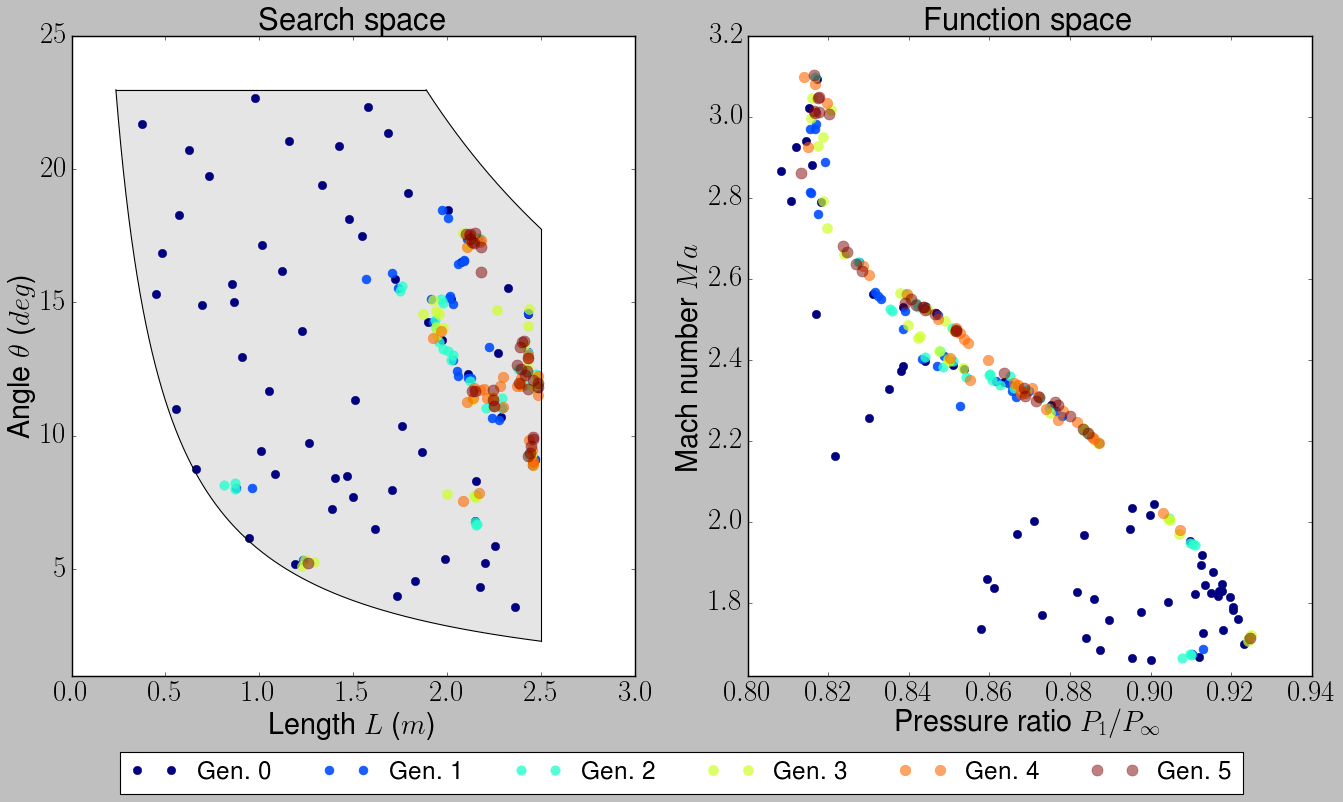

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
k = 6
for i in range(k):
    ax1.plot(gen[i][:,0],gen[i][:,1],'.',alpha=al[i],color=color[i],markersize=ms[i], label='Gen. %i' %i)
    ax2.plot(-gen[i][:,2],-gen[i][:,3],'.',alpha=al[i],color=color[i],markersize=ms[i])
ax1.legend(bbox_to_anchor=(2.1,-0.1), fontsize=22, ncol=NC[k-1])
ax1.set_title('Search space', fontsize=28)
ax2.set_title('Function space', fontsize=28)
ax1.tick_params(axis = 'both', labelsize = 26)
ax2.tick_params(axis = 'both', labelsize = 26)
ax1.set_xlabel(r'Length $L$ ($m$)',fontsize=26)
ax1.set_ylabel(r'Angle $\theta$ ($deg$)',fontsize=26)
ax2.set_xlabel(r"Pressure ratio $P_1/P_\infty$",fontsize=26)
ax2.set_ylabel(r'Mach number $Ma$',fontsize=26)

ax1.set_xlim([0.1,2.6])
ax1.set_ylim([2,25])
ax2.set_xlim([0.8,0.94])
ax2.set_ylim([1.62,3.2])

ax1.plot(L[np.logical_and(theta_max<detached,L<2.5)],theta_max[np.logical_and(theta_max<detached,L<2.5)],'k',linewidth=1)
ax1.plot(L[np.logical_and(L>minimum_L,L<2.5)],theta_min[np.logical_and(L>minimum_L,L<2.5)],'k',linewidth=1)
ax1.plot([minimum_L,maximum_L],[detached,detached],'k',linewidth=1)
ax1.plot([2.5,2.5],[np.rad2deg(np.arctan(0.8/2.5)),np.rad2deg(np.arctan(0.1/2.5))],'k',linewidth=1)
ax1.set_ylim([1,25])
ax1.set_xlim([L.min(),L.max()])
ax1.fill_between(L,detached*np.ones(len(L)),color='k',alpha=0.1, label='Search space')
ax1.fill_between(L,100*np.ones(len(L)),theta_max,color='w')
ax1.fill_between(L,theta_min,color='w')
ax1.fill_between([2.5,3.0],[45,45],color='w')

# plt.savefig('./diffuser.pdf' %(k-1), bbox_inches='tight')